Outlier is an observation in a given dataset that lies far from the rest of the observations. 

An outlier may occur due to the variability in the data, or due to experimental error/human error.

some of the techniques of detecting outliers
   
     Boxplots, Inter Quantile Range(IQR)

In [1]:
import pandas as pd
import numpy as np

In [2]:
sample = np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])
sample

array([ 15, 101,  18,   7,  13,  16,  11,  21,   5,  15,  10,   9])

Text(0.5, 0, 'Sample')

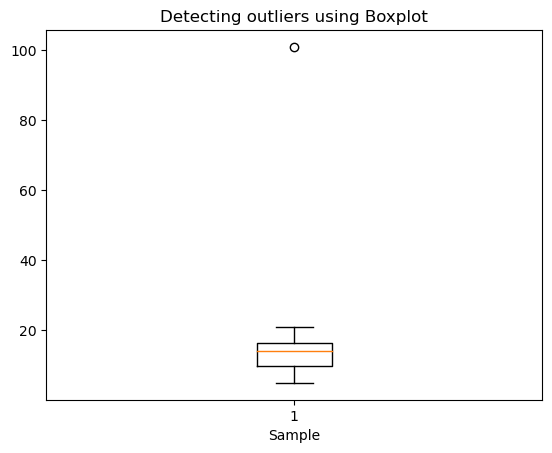

In [3]:
#Box Plot
import matplotlib.pyplot as plt
plt.boxplot(sample)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

Detecting outliers using the Inter Quantile Range(IQR)
Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

    1 Sort the dataset in ascending order,
    2 calculate the 1st and 3rd quartiles(Q1, Q3)
    3compute IQR=Q3-Q1,
    4 compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR),
    5 loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers





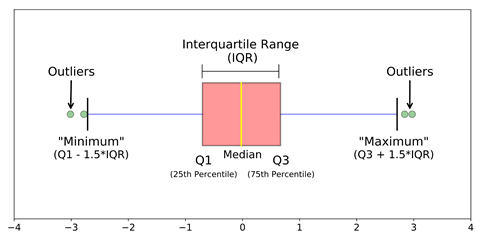

In [4]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    print("The Val of Q1 and Q2",q1, q3)
    
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

The Val of Q1 and Q2 9.75 16.5
The lower & Upper Bound -0.375 26.625
Outliers from IQR method:  [101]


In [5]:
#numpy.where(condition, x, y) 
import numpy as np  
a=np.arange(12)  
b=np.where(a<6,a,5*a)  
b  

array([ 0,  1,  2,  3,  4,  5, 30, 35, 40, 45, 50, 55])

# Handling Outlier
    
    Quantile based flooring and capping
   


In [6]:
#Quantile based flooring and capping
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
# Computing 10th, 90th percentiles and replacing the outliers

tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print("10percentile is ",tenth_percentile)
print("90th percentile is ",ninetieth_percentile)

b = np.where(sample<tenth_percentile, tenth_percentile, sample)
print(b)

b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print(b1)

print("Sample:", sample)
print("New array:",b1)

10percentile is  7.2
90th percentile is  20.700000000000003
[ 15.  101.   18.    7.2  13.   16.   11.   21.    7.2  15.   10.    9. ]
[15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]
Sample: [ 15 101  18   7  13  16  11  21   5  15  10   9]
New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


In [7]:
#Mean/Median imputation
#As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.
print(sample_outliers)

m = np.median(sample)# Replace with median
print(m)

for i in sample_outliers:
    c = np.where(sample==i, m, sample)

print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

[101]
14.0
Sample:  [ 15 101  18   7  13  16  11  21   5  15  10   9]
New array:  [15. 14. 18.  7. 13. 16. 11. 21.  5. 15. 10.  9.]


Text(0.5, 0, 'Sample')

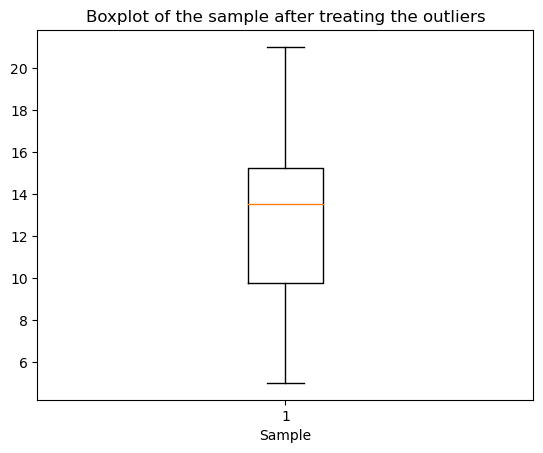

In [8]:
plt.boxplot(c)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")